<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Изучив данные в файле, могу отметить, что в столбце first_day_exposition нужно будет сделать дату более удобной для чтения; почти во всех столбцах встречаются пропуски, где-то чаще, где-то реже, нужно поработать над этим. В некоторых столбцах нужно поменять тип данных. 

## Предобработка данных

In [4]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Пропуски в столбце Высота потолков я заменил на медианное значение, так как высота потолков обычно стандартная, и примерно равна медиане - 2.6

In [5]:
data['balcony'] = data['balcony'].fillna(0)

Пропуски в столбце числа балконов присутствуют скорее всего по причине того, что люди просто не заполняли графу с балконом, если балкона в квартире нет. Поэтому я решил пропуски заменить на 0

In [6]:
print('Доля пропусков living_area {:.0%}'.format(data['living_area'].isna().sum()/len(data['living_area'])))
print('Доля пропусков kitchen_area {:.0%}'.format(data['kitchen_area'].isna().sum()/len(data['kitchen_area'])))
print('Доля пропусков locality_name {:.1%}'.format(data['locality_name'].isna().sum()/len(data['locality_name'])))
print('Доля пропусков days_exposition {:.0%}'.format(data['days_exposition'].isna().sum()/len(data['days_exposition'])))
print('Доля пропусков floors_total {:.1%}'.format(data['floors_total'].isna().sum()/len(data['floors_total'])))

Доля пропусков living_area 8%
Доля пропусков kitchen_area 10%
Доля пропусков locality_name 0.2%
Доля пропусков days_exposition 13%
Доля пропусков floors_total 0.4%


In [7]:
data = data.dropna(subset=['locality_name','floors_total'])

Пропуски в данных столбцах я решил удалить, так как в дальнейшем анализе данные этих столбцов будут использоваться.  Названия населенного пункта в данном случае у меня нет возможности восстановить, как и данные о количестве комнат. 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [13]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')

TypeError: cannot safely cast non-equivalent float64 to int64

я поменял тип данных на целое число для удобства, а в столбце апартаметы поменял на булево значение, так как в описании к заданию написано, что там представлены именно булевы значения

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [11]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Сделал дату публикации читаемой

Работу с предобработкой данных мы закончили успешно. Мы проанализировали пропуски, и заменили их на более подходящие значения. Там, где заполнение пропусков было невозможно, мы удалили эти строки для объективности дальнейшего исследования. Также поменяли тип данных там, где это было необходимо, и скорректировали формат даты. 

## Расчёты и добавление результатов в таблицу

In [12]:
data['price_square_meter'] = data['last_price'] / data['total_area']
data['price_square_meter'] = data['price_square_meter'].round(1)
#создал столбец с ценой квадратного метра, изменил тип на целочисленный

In [13]:
def apartment_floor(row):
    
    #функция для категоризации этажей
    
    if row['floor'] == 1:
        return 'первый'
    
    elif row['floor'] == row['floors_total']:
        return 'последний'
    
    else:
        return 'другой'

In [14]:
data['apartment_floor'] = data.apply(apartment_floor, axis=1)

In [15]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,apartment_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,другой


In [16]:
data['the_ratio_of_living_and_total_areas'] = data['living_area'] / data['total_area']
data['the_ratio_of_living_and_total_areas'] = data['the_ratio_of_living_and_total_areas'].round(1)

In [17]:
data['the_ratio_of_the_kitchen_to_the_total_areas'] = data['kitchen_area'] / data['total_area']
data['the_ratio_of_the_kitchen_to_the_total_areas'] = data['the_ratio_of_the_kitchen_to_the_total_areas'].round(1)
#создаю два столбца: соотношение жилой и общей площади; соотношение площади кухни к общей площади

In [18]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,apartment_floor,the_ratio_of_living_and_total_areas,the_ratio_of_the_kitchen_to_the_total_areas
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,другой,0.5,0.2
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,первый,0.5,0.3
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,другой,0.6,0.1
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,другой,0.3,0.4


In [19]:
data['month'] = data['first_day_exposition'].dt.month
data['day'] = data['first_day_exposition'].dt.day
data['year'] = data['first_day_exposition'].dt.year

## Исследовательский анализ данных

Избавимся от выбросов

(0.0, 1000.0)

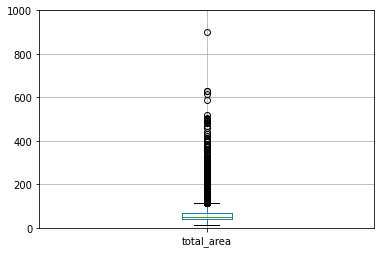

In [20]:
data.boxplot(column='total_area')
plt.ylim(0,1000)

In [21]:
data = data.query('0 < total_area < 600')

<AxesSubplot:>

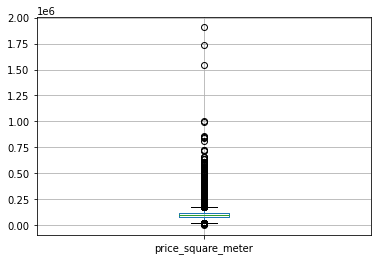

In [22]:
data.boxplot(column='price_square_meter')

In [23]:
data = data.query('0 < price_square_meter < 800000')

<AxesSubplot:>

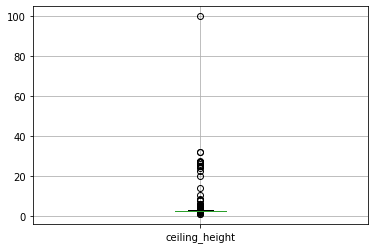

In [24]:
data.boxplot(column='ceiling_height')

In [25]:
data = data.query('2.5 < ceiling_height < 40')

# Гистограммы и графики

<AxesSubplot:>

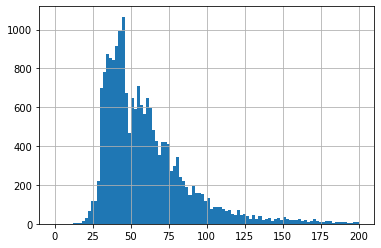

In [26]:
data['total_area'].hist(bins=100,range=(0,200))

Здесь мы видим, что в основном квартиры продавались с площадью от 30 до 75 кв м, выделяется пик на значении около 45 кв м. Квартир с площадью свыше 100 кв м намного меньше. 

<AxesSubplot:>

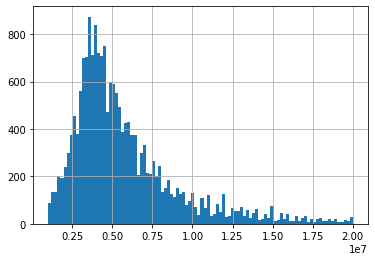

In [27]:
data['last_price'].hist(bins=100,range=(1000000,20000000))

на данной гистограмме видим, что цена, по которой продавалась большая часть квартир, составляет от 2 до 7,5 млн руб. 

<AxesSubplot:>

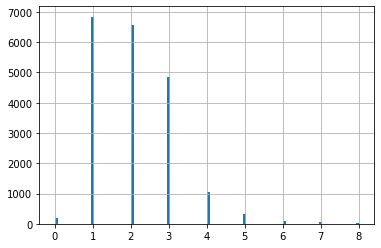

In [28]:
data['rooms'].hist(bins=100,range=(0,8))

на данной гистограмме видим, что в основном квартиры продают с одной, двумя и тремя комнатами

<AxesSubplot:>

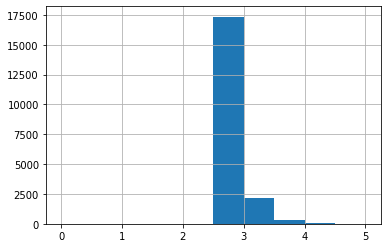

In [29]:
data['ceiling_height'].hist(bins=10,range=(0,5))

здесь видим, что в основном высота потолков продаваемых квартир 2,7 м, что соответсвует медиане. Гистограмма с данными о квартирах с потолками свыше 4 м имеет длинный хвост близкий к нулю, это означает что такие квартиры практически не продаются.  

<AxesSubplot:>

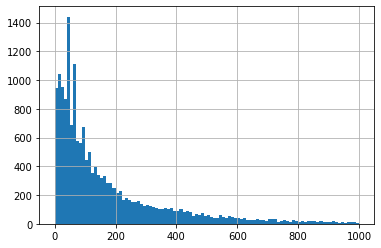

In [30]:
data['days_exposition'].hist(bins=100,range=(0,1000))

на данной гистограмме мы видим, что длительность размещения объявления в основном составляет до 150 дней, свыше 200 дней количество объявлений постепенно уменьшается. Есть два пика около значений 40 и и 60 дней. 

In [31]:
data['days_exposition'].mean()

183.46346220029827

In [32]:
data['days_exposition'].median()

97.0

обычно продажа квартиры занимает 102 дня, это почти 3,5 месяца. Среднее значение сильно отличается от медианы из-за выбивающихся значений. Отбросим длительность продажи квартир свыше 200 дней. 

In [33]:
data = data.query('0 < days_exposition < 200')
data['days_exposition'].median()

60.0

In [34]:
data['days_exposition'].mean()

72.97045252165466

теперь среднее значение намного меньше отличается от медианного, после того как мы отбросили слишком долгое количество дней. Медиана уменьшилась почти в 2 раза, и теперь мы можем сделать вывод, что обычно квартиры продаются за 2 месяца после размещения объявления. 

<AxesSubplot:>

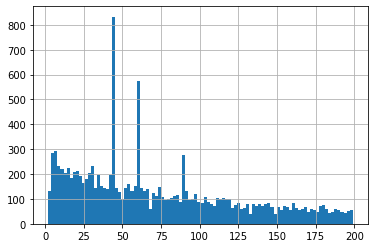

In [35]:
data['days_exposition'].hist(bins=100)

на гистограмме мы также можем наблюдать два больших пика по значениям, это значение около 45 дней, около 60 дней. Могу предположить, что эти пики связаны с работой приложения, то есть в эти сроки может заканчиваться период размещения объявления, а дальше пользователь должен решить, продлевать или нет. И часто бывает так, что пользователь просто забывает продлить, и размещение уходит в архив. 

In [36]:
data['total_area'].corr(data['last_price'])

0.717433401306742

цена от площади имеет положительную зависимость, с увеличением площади, цена также растет

<AxesSubplot:xlabel='rooms'>

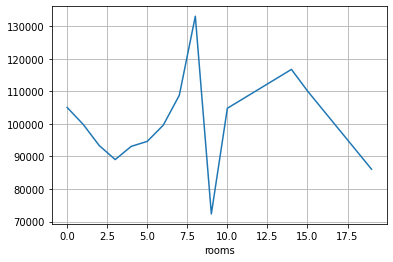

In [37]:
data.groupby('rooms')['price_square_meter'].median().plot(x='rooms',y='price_square_meter',grid=True)

Зависимость цены квадратного метра от количества комнат: мы можем заметить, что однокомнатные квартиры дороже, чем двух-трех-четырех-пятикомнатные квартиры, однако начиная с шестикомнатных квартир, цена на квадратный метр резко увеличивается. 

In [38]:
data = data.query('0 < days_exposition < 7500000')

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

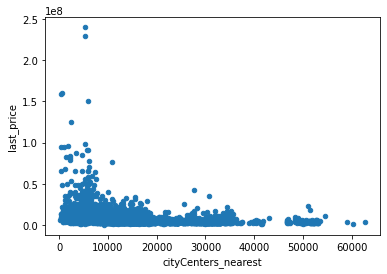

In [39]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter') 

На данных графиках видно, что чем дальше от центра, тем меньше цена.

<AxesSubplot:xlabel='apartment_floor'>

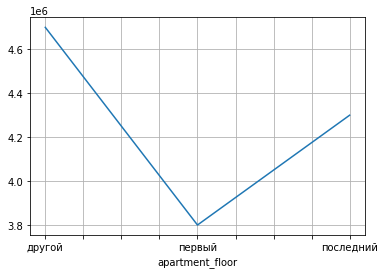

In [40]:
data.groupby('apartment_floor')['last_price'].median().plot(x='cityCenters_nearest',y='last_price',grid=True)

На данном графике мы видим, что квартиры на первом этаже дешевле, чем на любом другом этаже. Самые "дорогие" этажи, это не первый и не последний, что точно совпадает с реальностью.

In [41]:
data['month'] = data['first_day_exposition'].dt.month

<AxesSubplot:xlabel='month'>

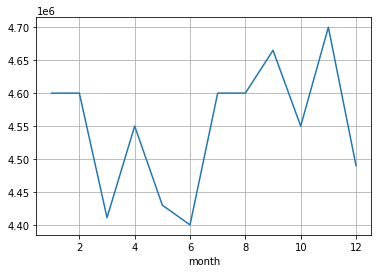

In [42]:
data.groupby('month')['last_price'].median().plot(x='month',y='last_price',grid=True)

На данном графике мы видим, как цена зависит от даты размещения, в данном случае от месяца размещения. Квартиры с самыми низкими ценами размещают в июне, а с самыми высокими в феврале, апреле, августе, сентябре и ноябре. 

In [43]:
data['year'] = data['first_day_exposition'].dt.year

<AxesSubplot:xlabel='year'>

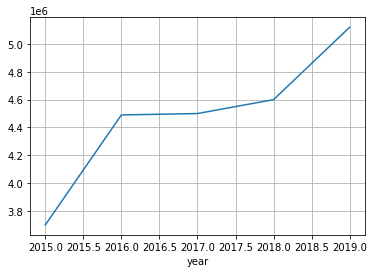

In [44]:
data.groupby('year')['last_price'].median().plot(x='year',y='last_price',grid=True)

Здесь мы наблюдаем резкий рост цены в 2015 году, в 2016 году цена оставалась без изменений, в 2017-2019 наблюдается плавный рост цен. 

In [45]:
data['day'] = data['first_day_exposition'].dt.day

<AxesSubplot:xlabel='day'>

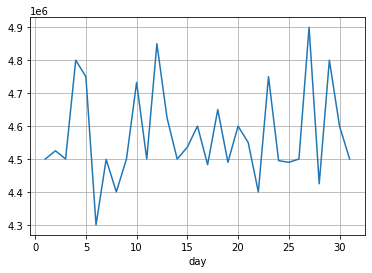

In [46]:
data.groupby('day')['last_price'].median().plot(x='day',y='last_price',grid=True)

На графике зависимости цены от дня месяца я не наблюдаю какой-либо зависимости

Посчитаем среднюю цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

In [47]:
top_10 = (
    data.groupby('locality_name')
    .agg(Количество_объявлений=('locality_name','count'),
        Средняя_цена_м2=('price_square_meter','mean'))
    .sort_values(by='Количество_объявлений',ascending=False)
    .head(10)
)
display('Топ - 10 населенных пунктов, по количеству объявлений',top_10)
display('Топ - 10 населенных пунктов, по количеству объявлений. Дополнительная сортировка по цене недвижимости',top_10.sort_values('Средняя_цена_м2',ascending=False))

'Топ - 10 населенных пунктов, по количеству объявлений'

,Количество_объявлений,Средняя_цена_м2
locality_name,,
Санкт-Петербург,8271,112056.859932
посёлок Мурино,401,86215.506733
посёлок Шушары,292,77938.447603
деревня Кудрово,216,93149.019907
посёлок Парголово,212,89128.412736
Всеволожск,211,70171.338863
Колпино,162,74705.912346
Пушкин,156,101829.850641
Гатчина,141,68553.343972


'Топ - 10 населенных пунктов, по количеству объявлений. Дополнительная сортировка по цене недвижимости'

,Количество_объявлений,Средняя_цена_м2
locality_name,,
Санкт-Петербург,8271,112056.859932
Пушкин,156,101829.850641
деревня Кудрово,216,93149.019907
посёлок Парголово,212,89128.412736
посёлок Мурино,401,86215.506733
посёлок Шушары,292,77938.447603
Колпино,162,74705.912346
Всеволожск,211,70171.338863
Гатчина,141,68553.343972


In [48]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()
#создал столбец с расстоянием до центра города в км, значения округлены

In [49]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']

<AxesSubplot:xlabel='cityCenters_nearest_km'>

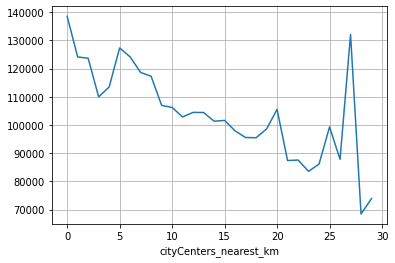

In [50]:
data_spb.groupby('cityCenters_nearest_km')['price_square_meter'].median().plot(x='cityCenters_nearest_km',y='price_square_meter',grid=True)

на графике зависимости цены за квадратный метр от удалённости от центра видно, что чем дальше от центра, тем цена за квадратный метр снижается. Центральная зона в Санкт-Петербурге заканчивается на расстоянии от центра около 5-6 км, где на графике наблюдается резкое снижение цены за квадратный метр. При этом на расстоянии 26 км от центра происхдит резкий скачок цены.

Проанализируем объявления в центре Санкт-Петербурга

In [51]:
data_spb = data[data['cityCenters_nearest_km'] <= 6]

<AxesSubplot:xlabel='rooms'>

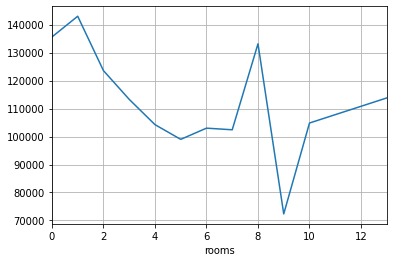

In [52]:
data_spb.groupby('rooms')['price_square_meter'].median().plot(x='rooms',y='price_square_meter',xlim=(0,13),grid=True)

На графике зависимости цена за квадратный метр от количества комнат мы видим, что цена достаточно резко снижается с увеличением количества комнат в квартире. Если сравнивать центр Санкт-Петербурга с данными о городах, представленных в датафрейме, то там наблюдается небольшое снижение цены за трехкомнатные квартиры, а дальше небольшое увеличение цен до 12-комнатных квартир. 

<AxesSubplot:xlabel='floor'>

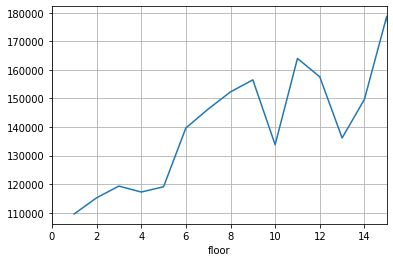

In [53]:
data_spb.groupby('floor')['price_square_meter'].median().plot(x='floor',y='price_square_meter',xlim=(0,15),grid=True)

В центральной зоне Санкт-Петербурга чем выше этаж, тем дороже цена за квадратный метр, что совпадает с теми же данными в других населенных пунктах

На графиках которые находятся выше, с зависимостью цены от удаления от центра мы можем сделать вывод, что в центре Санкт-Петербурга, что в других населенных пунктах чем дальше от центра, тем цена ниже. 

<AxesSubplot:xlabel='month'>

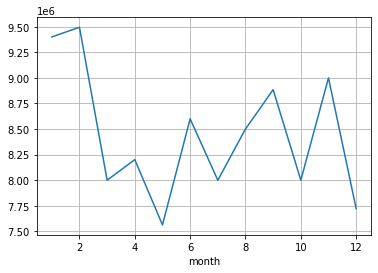

In [54]:
data_spb['month'] = data_spb['first_day_exposition'].dt.month
data_spb.groupby('month')['last_price'].median().plot(x='month',y='last_price',grid=True)

В центральной зоне Санкт-Петербурга на графике зависимости цены от месяца размещения объявления видим, что максимальные цены квартир размещались в феврале, сентябре и ноябре, что мало отличается от остальных населенных пунктов. Минимальные цены квартир размещались с марта по май, и в октябре, здесь совпадает только октябрь с остальными населенными пунктами, а вот с марта по май в других населеннх пунктах наоборот, цена квартир увеличивалась. 

<AxesSubplot:xlabel='day'>

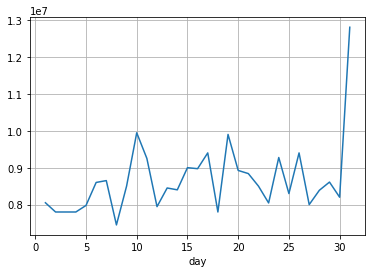

In [55]:
data_spb['day'] = data_spb['first_day_exposition'].dt.day
data_spb.groupby('day')['last_price'].median().plot(x='day',y='last_price',grid=True)

На графике зависимости цены от дня размещения объявления я не наблюдаю какой-либо зависимости, так же как и в остальных населенных пунктах

<AxesSubplot:xlabel='year'>

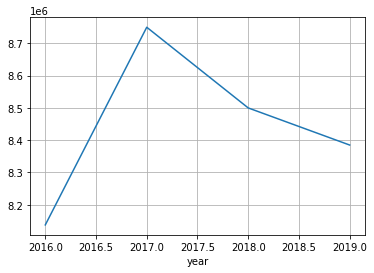

In [56]:
data_spb['year'] = data_spb['first_day_exposition'].dt.year
data_spb.groupby('year')['last_price'].median().plot(x='year',y='last_price',grid=True)

На данном графике зависимости цены от года размещения объявления видим, что в 2016 году был резкий рост цен как и в остальных населеных пунктах, а вот начиная с 2017 года в центральной зоне Санкт-Петербурга цены идут на спад, в то время как в остальных населенных пунктах цена плавно растет

## Общий вывод

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод